In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("spam.csv")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data cleaning

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [7]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [9]:
df['target']=lb.fit_transform(df['target'])

In [10]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## 0-ham ,1-spam

In [11]:
df.shape

(5572, 2)

In [12]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# 2.EDA

In [17]:
df.sample(5)

,target,text
4348,0,�� bot notes oredi... Cos i juz rem i got...
1084,0,For me the love should start with attraction.i...
2939,1,You have 1 new message. Please call 08712400200.
803,1,You have won a guaranteed �200 award or even �...
897,0,I'm used to it. I just hope my agents don't dr...


In [18]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

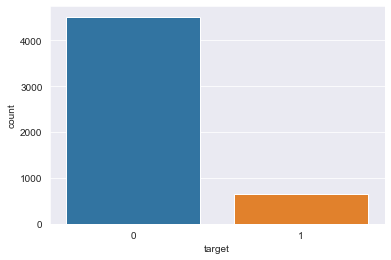

In [19]:
sns.countplot(df['target']);

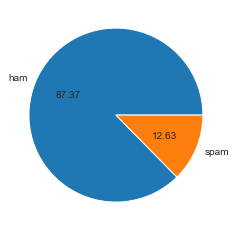

In [20]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f");

### Data is imbalanced so precession should be high for this use case 

In [21]:
!pip install nltk  --quiet

In [22]:
import nltk

In [23]:
nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sukrav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sukrav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords

In [26]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [27]:
#To find no of charcters 
df['characters']=df['text'].apply(len)
df.head()

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
df['text'].apply(lambda x : nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, �_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [29]:
df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [30]:
# To find no of words
df['words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,target,text,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['text'].apply(lambda x : nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will �_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [32]:
df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [33]:
#To find no of sentences
df['sentences']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['characters','words','sentences']].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


### Ham Statistical Descreption

In [35]:
df[df['target']==0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


### Spam Statistical Descreption

In [36]:
df[df['target']==1][['characters','words','sentences']].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [37]:
new_df=[['characters','words','sentences']]

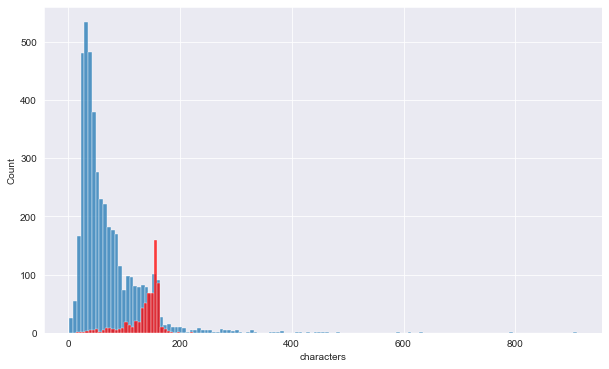

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['characters'])
sns.histplot(df[df['target']==1]['characters'],color='red')
plt.show()

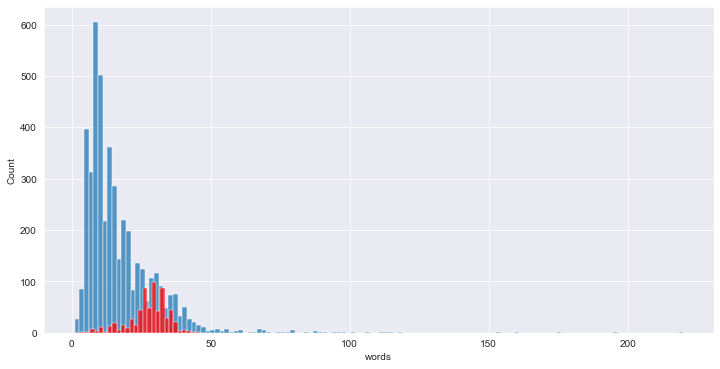

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['words'])
sns.histplot(df[df['target']==1]['words'],color='red')
plt.show()

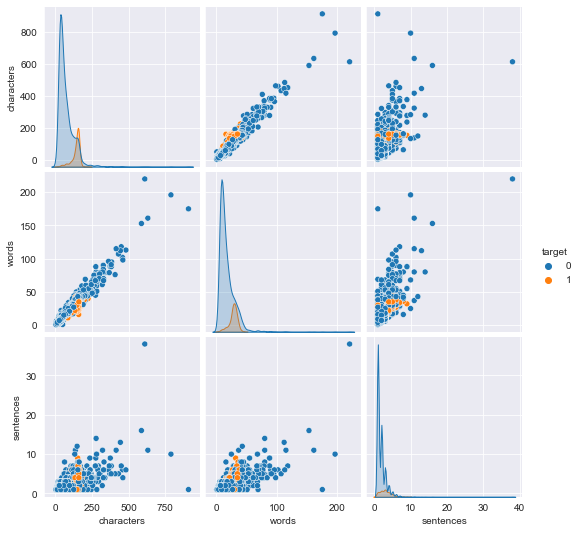

In [40]:
sns.pairplot(df,hue='target');

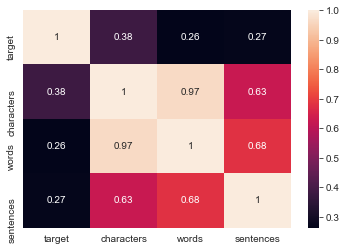

In [41]:
sns.heatmap(df.corr(),annot=True);

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [42]:
import string

In [43]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [45]:
def preprocess_text(text):
    text = text.lower()             #Converting to Lower case
    text = nltk.word_tokenize(text) #Converting to Tokenization
    
    y = []
    for i in text:
        if i.isalnum():    #Removing special characters
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:  #Removing stop words and punctuation
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))    #Stemming
    
            
    return " ".join(y)

In [46]:
preprocess_text("I'm going to using This fUnction is% usEd to preProcess ?.,>the text")

'go use function use preprocess text'

In [47]:
df['transformed_text']=df['text'].apply(preprocess_text)

In [48]:
df.head()

,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
!pip install wordcloud --quiet

In [50]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

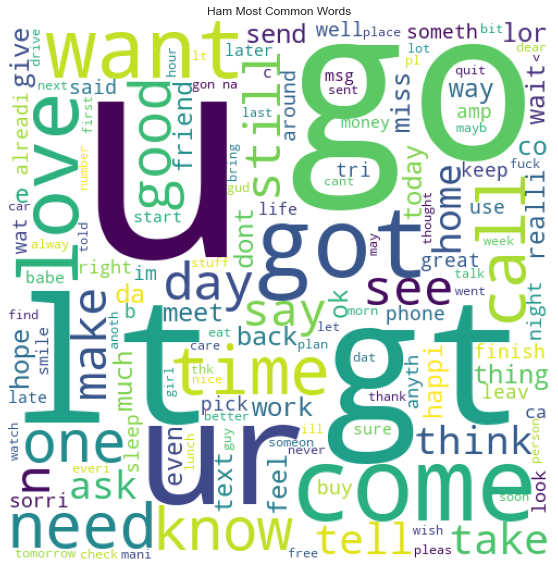

In [51]:
plt.figure(figsize=(26,10))
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=''))
plt.imshow(ham_wc)
plt.title('Ham Most Common Words')
plt.axis('off')
plt.show()

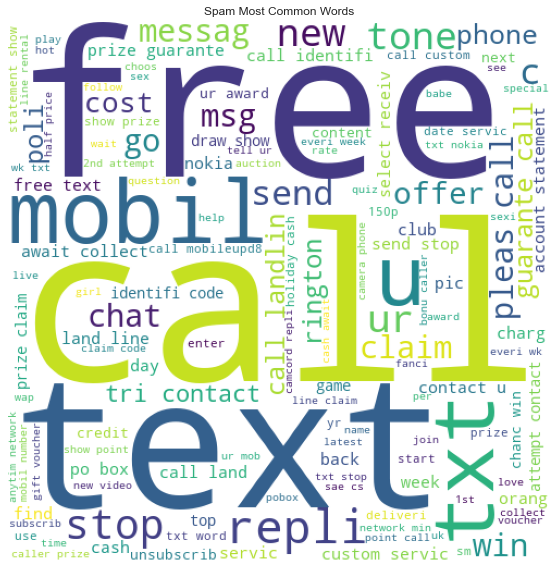

In [52]:
plt.figure(figsize=(26,10))
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=''))
plt.imshow(spam_wc)
plt.title('Spam Most Common Words')
plt.axis('off')
plt.show()

In [53]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9941

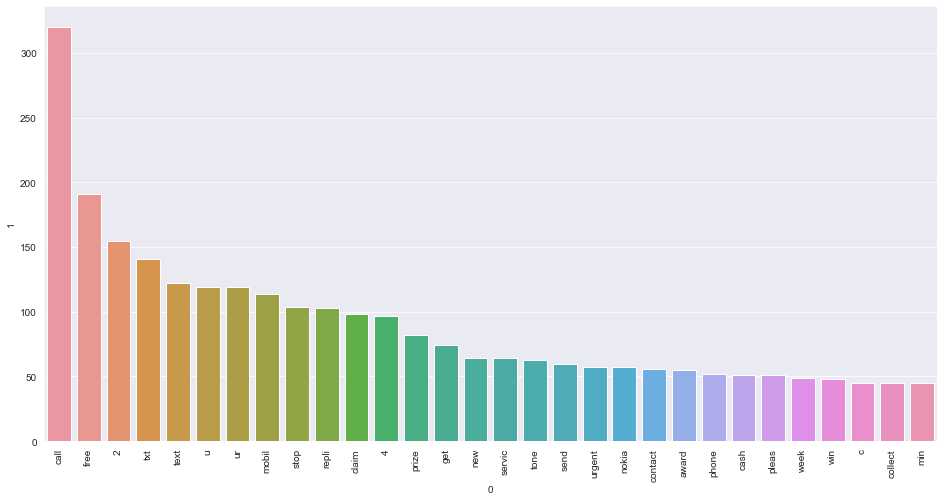

In [55]:
plt.figure(figsize=(16,8))
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

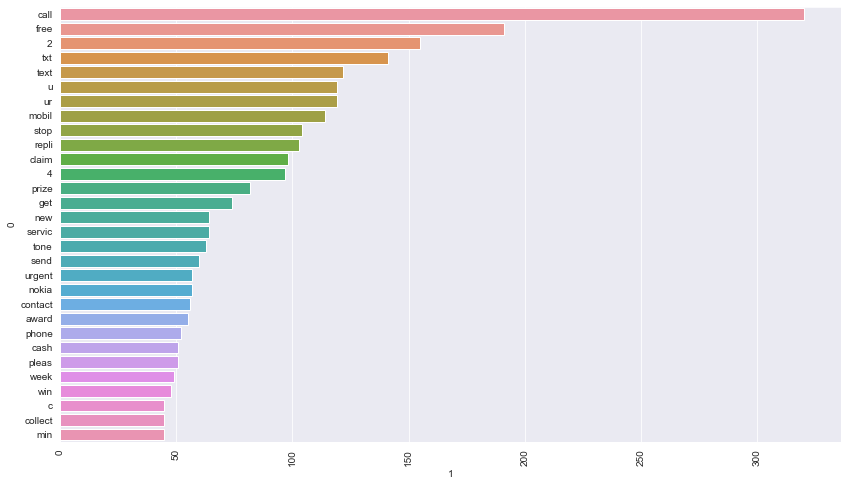

In [57]:
plt.figure(figsize=(14,8)),
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1],pd.DataFrame(Counter(spam_corpus).most_common(30))[0],orient="h")
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [58]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [152]:
tfidf=TfidfVectorizer(max_features=3000)

In [153]:
X=tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [154]:
X.shape

(5169, 3000)

In [155]:
y=df['target'].values

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

#### We kn that for any text based data Naive bayes Algorith works well

In [158]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,accuracy_score

In [159]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result

In [160]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)

In [161]:
model_eval(y_test,y_pred_gnb)

{'Accuracy': 0.8704061895551257,
 'Precision': 0.509090909090909,
 'Recall': 0.8115942028985508,
 'Specficity': 0.8794642857142857,
 'F1': 0.6256983240223463}

In [162]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)

In [163]:
model_eval(y_test,y_pred_mnb)

{'Accuracy': 0.971953578336557,
 'Precision': 1.0,
 'Recall': 0.7898550724637681,
 'Specficity': 1.0,
 'F1': 0.8825910931174089}

In [164]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)

In [165]:
model_eval(y_test,y_pred_bnb)

{'Accuracy': 0.9835589941972921,
 'Precision': 0.991869918699187,
 'Recall': 0.8840579710144928,
 'Specficity': 0.9988839285714286,
 'F1': 0.9348659003831418}

## Trying with Other Algorithms

In [166]:
!pip install xgboost --quiet

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from xgboost import XGBClassifier

In [168]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [169]:
clfs = {
    'SVC' : svc,
    'KNN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [170]:
def train_model(clf,X_train,X_test,y_train,y_test):  ##This function holds good for only binary classifications
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    return accuracy,precision,recall,F1_Score

In [171]:
train_model(mnb,X_train,X_test,y_train,y_test)  #Checking the function

(0.971953578336557, 1.0, 0.7898550724637681, 0.8825910931174089)

In [172]:
clfs.keys()

dict_keys(['SVC', 'KNN', 'NB', 'DT', 'LR', 'RF', 'AdaBoost', 'BgC', 'ETC', 'GBDT', 'xgb'])

In [173]:
clfs.items()

dict_items([('SVC', SVC(gamma=1.0, kernel='sigmoid')), ('KNN', KNeighborsClassifier()), ('NB', MultinomialNB()), ('DT', DecisionTreeClassifier(max_depth=5)), ('LR', LogisticRegression(penalty='l1', solver='liblinear')), ('RF', RandomForestClassifier(n_estimators=50, random_state=2)), ('AdaBoost', AdaBoostClassifier(random_state=2)), ('BgC', BaggingClassifier(n_estimators=50, random_state=2)), ('ETC', ExtraTreesClassifier(n_estimators=50, random_state=2)), ('GBDT', GradientBoostingClassifier(n_estimators=50, random_state=2)), ('xgb', XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_paral

In [174]:
accuracy_scores = []
precision_scores = []
recall_scores =[]
F1_Score_scores = []

for name,clf in clfs.items():
    accuracy,precision,recall,F1_Score=train_model(clf,X_train,X_test,y_train,y_test)
    
    print("For",name)
    print("Accuracy - ",accuracy)
    print("Precision - ",precision)
    print("Recall - ",recall)
    print("F1-score - ",F1_Score) 
    print('-' * 100)
    
    
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(accuracy)
    F1_Score_scores.append(F1_Score)

For SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
Recall -  0.8333333333333334
F1-score -  0.8984375
----------------------------------------------------------------------------------------------------
For KNN
Accuracy -  0.9052224371373307
Precision -  1.0
Recall -  0.2898550724637681
F1-score -  0.44943820224719105
----------------------------------------------------------------------------------------------------
For NB
Accuracy -  0.971953578336557
Precision -  1.0
Recall -  0.7898550724637681
F1-score -  0.8825910931174089
----------------------------------------------------------------------------------------------------
For DT
Accuracy -  0.9313346228239845
Precision -  0.8252427184466019
Recall -  0.6159420289855072
F1-score -  0.7053941908713693
----------------------------------------------------------------------------------------------------
For LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
Recall -  0.6956521739130435
F1-score -  0.

In [150]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,
                               'Recall':recall_scores,"F1-score":F1_Score_scores}).sort_values('Precision',ascending=False)

In [151]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1-score
1,KNN,0.900387,1.000000,0.900387,0.404624
2,NB,0.959381,1.000000,0.959381,0.820513
8,ETC,0.977756,0.991453,0.977756,0.909804
5,RF,0.970019,0.990826,0.970019,0.874494
0,SVC,0.972921,0.974138,0.972921,0.889764
6,AdaBoost,0.962282,0.954128,0.962282,0.842105
10,xgb,0.971954,0.950413,0.971954,0.888031
4,LR,0.951644,0.940000,0.951644,0.789916
9,GBDT,0.951644,0.931373,0.951644,0.791667
7,BgC,0.957447,0.861538,0.957447,0.835821


## model improve
### 1. Change the max_features parameter of TfIdf

max_features=3000

In [177]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores,
                       'Recall_max_ft_3000':recall_scores,"F1-score_max_ft_3000":F1_Score_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [178]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000,Recall_max_ft_3000,F1-score_max_ft_3000
1,KNN,0.905222,1.000000,0.905222,0.449438
2,NB,0.971954,1.000000,0.971954,0.882591
5,RF,0.975822,0.982906,0.975822,0.901961
8,ETC,0.979691,0.975610,0.979691,0.919540
0,SVC,0.974855,0.974576,0.974855,0.898438
4,LR,0.956480,0.969697,0.956480,0.810127
6,AdaBoost,0.961315,0.945455,0.961315,0.838710
10,xgb,0.968085,0.933884,0.968085,0.872587
9,GBDT,0.946809,0.927835,0.946809,0.765957
7,BgC,0.959381,0.869231,0.959381,0.843284


In [179]:
final_df=performance_df.merge(temp_df,on='Algorithm')
final_df

,Algorithm,Accuracy,Precision,Recall,F1-score,Accuracy_max_ft_3000,Precision_max_ft_3000,Recall_max_ft_3000,F1-score_max_ft_3000
0,KNN,0.900387,1.000000,0.900387,0.404624,0.905222,1.000000,0.905222,0.449438
1,NB,0.959381,1.000000,0.959381,0.820513,0.971954,1.000000,0.971954,0.882591
2,ETC,0.977756,0.991453,0.977756,0.909804,0.979691,0.975610,0.979691,0.919540
3,RF,0.970019,0.990826,0.970019,0.874494,0.975822,0.982906,0.975822,0.901961
4,SVC,0.972921,0.974138,0.972921,0.889764,0.974855,0.974576,0.974855,0.898438
5,AdaBoost,0.962282,0.954128,0.962282,0.842105,0.961315,0.945455,0.961315,0.838710
6,xgb,0.971954,0.950413,0.971954,0.888031,0.968085,0.933884,0.968085,0.872587
7,LR,0.951644,0.940000,0.951644,0.789916,0.956480,0.969697,0.956480,0.810127
8,GBDT,0.951644,0.931373,0.951644,0.791667,0.946809,0.927835,0.946809,0.765957
9,BgC,0.957447,0.861538,0.957447,0.835821,0.959381,0.869231,0.959381,0.843284


In [180]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))